In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [6]:
df = df.fillna(df.median())
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [7]:
countries = df.cntry.unique().tolist()
countries

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

# Did people become less trusting from 2012 to 2014? 

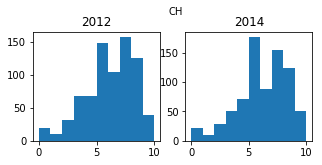

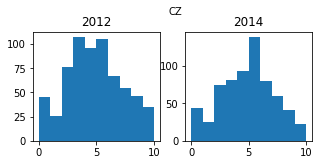

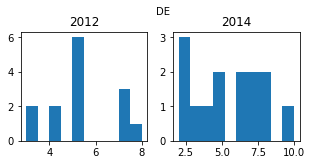

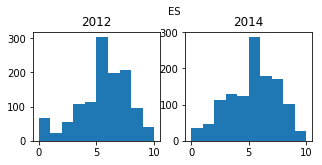

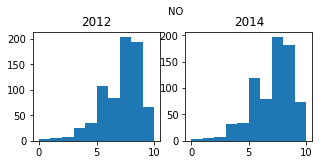

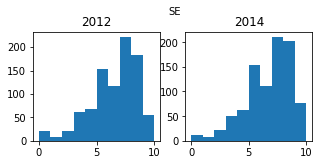

In [8]:
for country in countries:
    
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)])
    ax1[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)])

    fig.text(0.5, 1, country)
    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [9]:
for country in countries:
    print(country)
    print('2012 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)]
                         ))

CH
2012 mean: 5.67787839586
2014 mean: 5.75161707633
Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)
CZ
2012 mean: 4.37993920973
2014 mean: 4.42705167173
Ttest_relResult(statistic=-0.3505247744198508, pvalue=0.72605725523006459)
DE
2012 mean: 5.21428571429
2014 mean: 5.35714285714
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.85685637970958051)
ES
2012 mean: 5.11459192086
2014 mean: 4.89694971146
Ttest_relResult(statistic=2.4654605168309875, pvalue=0.013821475296285565)
NO
2012 mean: 6.64842681259
2014 mean: 6.59781121751
Ttest_relResult(statistic=0.53608305830972203, pvalue=0.5920644526109955)
SE
2012 mean: 6.05837004405
2014 mean: 6.2577092511
Ttest_relResult(statistic=-2.0779526353666138, pvalue=0.037994493452976834)


## Conclusion

People in different countries represented varied in their amounts of increased or decreased trust from 2012 to 2014. I chose to analyze this using the t-test for paired samples, since these data follow the same individuals over the testing period.

People in Spain experienced a significant decrease in their trust levels between 2012 and 2014, where as people in Sweden saw a significant increase. The other four countries stayed relatively stable during this period, based on this sample. 

# Did people become happier from 2012 to 2014? 

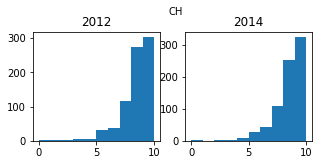

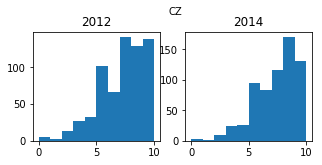

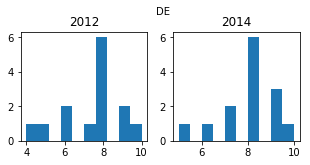

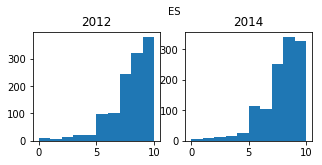

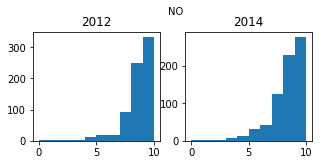

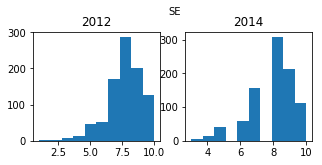

In [10]:
for country in countries:
    
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)])
    ax1[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)])

    fig.text(0.5, 1, country)
    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [11]:
for country in countries:
    print(country)
    print('2012 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                         df['happy'][(df['cntry'] == country) & (df['year']==7)]
                        ))

CH
2012 mean: 8.08796895213
2014 mean: 8.11642949547
WilcoxonResult(statistic=93384.0, pvalue=0.92484631303907039)
CZ
2012 mean: 6.79331306991
2014 mean: 6.92401215805
WilcoxonResult(statistic=78000.5, pvalue=0.28296308381494129)
DE
2012 mean: 7.42857142857
2014 mean: 7.85714285714
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES
2012 mean: 7.54905193735
2014 mean: 7.42044517725
WilcoxonResult(statistic=232720.5, pvalue=0.059772872562481524)
NO
2012 mean: 8.25034199726
2014 mean: 7.91518467852
WilcoxonResult(statistic=68546.0, pvalue=1.1346429849504098e-05)
SE
2012 mean: 7.90748898678
2014 mean: 7.94713656388
WilcoxonResult(statistic=126465.0, pvalue=0.68245114403798701)


## Conclusion

Based on the data from 2012 and 2014, people from Norway became less happy over that time period. All other countries represented here did not see a statistically significant change. Spain's p-value was close to being significant at a .05 level, but there are very few data points from Spain, making this test inconclusive. 

I chose to analyze these data with the Wilcoxon signed-rank test, as the distributions were far from normal and the data was paired between the two years. 

# Who reported watching more TV in 2012, men or women?


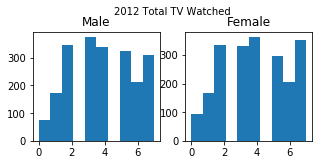

In [12]:
df_male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
df_female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

ax1[0].hist(df_male)
ax1[1].hist(df_female)

fig.text(0.35, 1, '2012 Total TV Watched')
ax1[0].set_title('Male')
ax1[1].set_title('Female')
    
plt.show()

In [13]:
print('Male mean: ' + str(df_male.mean()))
print('Female mean: ' + str(df_female.mean()))  
print(stats.mannwhitneyu(df_male, df_female))

Male mean: 3.90204271123
Female mean: 3.94447036864
MannwhitneyuResult(statistic=2277450.5, pvalue=0.22376355068970721)


## Conclusion

To compare the TV viewing habits of men and women in the same year, I chose to use the Mann Whitney U test. This is because the distributions were far from normal (maybe closest to uniform, however missing some values altogether), and the data was not paired, as it is comparing man and women, instead of the same person over different years. 

The Mann Whitney U test indicated that there was no significant difference between the TV viewing habits between men and women. 

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

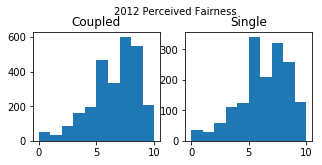

In [14]:
df_partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
df_single = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

ax1[0].hist(df_partner)
ax1[1].hist(df_single)

fig.text(0.35, 1, '2012 Perceived Fairness')
ax1[0].set_title('Coupled')
ax1[1].set_title('Single')
    
plt.show()

In [15]:
print('The mean perceived fairness for coupled people is: ' + str(df_partner.mean()))
print('The mean perceived fairness for single people is: ' + str(df_single.mean()))  
print(stats.ttest_ind(df_partner, df_single))

The mean perceived fairness for coupled people is: 6.08243192838
The mean perceived fairness for single people is: 5.85767326733
Ttest_indResult(statistic=3.3526650393131754, pvalue=0.00080730020288659018)


## Conclusion

To test the difference in perceived fairness between those people living with a partner and those people who live alone, I chose to use a t-test for independent samples. The distributions resembled normality, at least when compared with most others in this exercise, and the two samples are independent. 

The test indicated that people living with a partner judge others as being more fair, than people living alone, who judge people as less fair. 

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [16]:
ch_soc = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)]
cz_soc = df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)]
no_soc = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]
se_soc = df['sclmeet'][(df['cntry'] == 'SE') & (df['year'] == 7)]

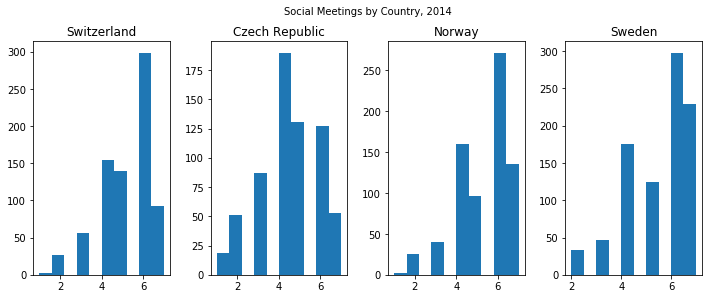

In [17]:
fig, ax1 = plt.subplots(1, 4, figsize=(10, 4))

ax1[0].hist(ch_soc)
ax1[1].hist(cz_soc)
ax1[2].hist(no_soc)
ax1[3].hist(se_soc)

fig.text(0.4, 1, 'Social Meetings by Country, 2014')
ax1[0].set_title('Switzerland')
ax1[1].set_title('Czech Republic')
ax1[2].set_title('Norway')
ax1[3].set_title('Sweden')
    
plt.tight_layout()
plt.show()

In [18]:
F, p = stats.f_oneway(ch_soc, cz_soc, no_soc, se_soc)

print('F score: ' + str(F))
print('P-value: ' + str(p))

F score: 71.1185277262
P-value: 1.84217525307e-44


### p < .05, so there's a difference somewhere!


In [19]:
print('Switzerland mean: ' + str(ch_soc.mean()))
print('Czech Republic mean: ' + str(cz_soc.mean()))
print('Norway mean: ' + str(no_soc.mean()))
print('Sweden mean: ' + str(se_soc.mean()))

Switzerland mean: 5.1617076326
Czech Republic mean: 4.45288753799
Norway mean: 5.3023255814
Sweden mean: 5.42621145374


In [20]:
print('Switzerland and Czech Republic: ' + str(stats.ttest_ind(ch_soc, cz_soc)))
print('Switzerland and Norway: ' + str(stats.ttest_ind(ch_soc, no_soc)))
print('Switzerland and Sweden: ' + str(stats.ttest_ind(ch_soc, se_soc)))
print('Czech Republic and Norway: ' + str(stats.ttest_ind(cz_soc, no_soc)))
print('Czech Republic and Sweden: ' + str(stats.ttest_ind(cz_soc, se_soc)))
print('Norway and Sweden: ' + str(stats.ttest_ind(no_soc, se_soc)))

Switzerland and Czech Republic: Ttest_indResult(statistic=9.6090324190812435, pvalue=3.1577408168058905e-21)
Switzerland and Norway: Ttest_indResult(statistic=-2.0531728839815022, pvalue=0.040228683674215074)
Switzerland and Sweden: Ttest_indResult(statistic=-4.0227626895095154, pvalue=6.0073262569460029e-05)
Czech Republic and Norway: Ttest_indResult(statistic=-11.186939382725051, pvalue=7.0789166186303073e-28)
Czech Republic and Sweden: Ttest_indResult(statistic=-13.389587151683251, pvalue=8.7117782806599256e-39)
Norway and Sweden: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.067344124325977833)


## Conclusion

The one-way ANOVA shows that there is a significant difference in social meeting frequency between at least one pair of countries. Independent t-tests of each pair show that there is a significant difference between all pairs represented here except for Norway and Sweden. 

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [21]:
ch_soc_act = df['sclact'][(df['cntry'] == 'CH') & (df['year'] == 7)]
cz_soc_act = df['sclact'][(df['cntry'] == 'CZ') & (df['year'] == 7)]
no_soc_act = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)]
se_soc_act = df['sclact'][(df['cntry'] == 'SE') & (df['year'] == 7)]

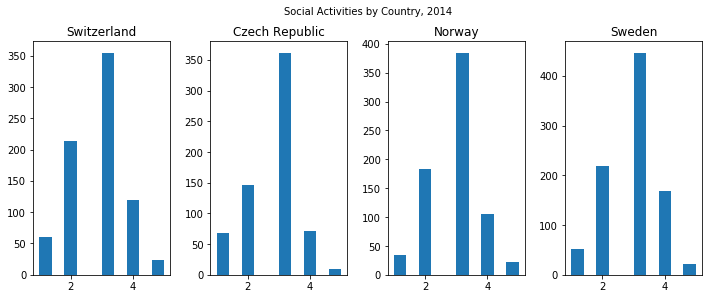

In [22]:
fig, ax1 = plt.subplots(1, 4, figsize=(10, 4))

ax1[0].hist(ch_soc_act)
ax1[1].hist(cz_soc_act)
ax1[2].hist(no_soc_act)
ax1[3].hist(se_soc_act)

fig.text(0.4, 1, 'Social Activities by Country, 2014')
ax1[0].set_title('Switzerland')
ax1[1].set_title('Czech Republic')
ax1[2].set_title('Norway')
ax1[3].set_title('Sweden')
   
plt.tight_layout()
plt.show()

In [23]:
F, p = stats.f_oneway(ch_soc_act, cz_soc_act, no_soc_act, se_soc_act)

print('F score: ' + str(F))
print('P-value: ' + str(p))

F score: 6.1469093737
P-value: 0.000365713258484


### p < .05, so, again, there's a difference somewhere!


In [24]:
print('Switzerland mean: ' + str(ch_soc_act.mean()))
print('Czech Republic mean: ' + str(cz_soc_act.mean()))
print('Norway mean: ' + str(no_soc_act.mean()))
print('Sweden mean: ' + str(se_soc_act.mean()))

Switzerland mean: 2.78395860285
Czech Republic mean: 2.70668693009
Norway mean: 2.85909712722
Sweden mean: 2.87995594714


In [25]:
print('Switzerland and Czech Republic: ' + str(stats.ttest_ind(ch_soc_act, cz_soc_act)))
print('Switzerland and Norway: ' + str(stats.ttest_ind(ch_soc_act, no_soc_act)))
print('Switzerland and Sweden: ' + str(stats.ttest_ind(ch_soc_act, se_soc_act)))
print('Czech Republic and Norway: ' + str(stats.ttest_ind(cz_soc_act, no_soc_act)))
print('Czech Republic and Sweden: ' + str(stats.ttest_ind(cz_soc_act, se_soc_act)))
print('Norway and Sweden: ' + str(stats.ttest_ind(no_soc_act, se_soc_act)))

Switzerland and Czech Republic: Ttest_indResult(statistic=1.6549480585587841, pvalue=0.098154623475653818)
Switzerland and Norway: Ttest_indResult(statistic=-1.6721779639438938, pvalue=0.094697509472510585)
Switzerland and Sweden: Ttest_indResult(statistic=-2.2234265593092819, pvalue=0.026319699790955674)
Czech Republic and Norway: Ttest_indResult(statistic=-3.3864422185314069, pvalue=0.00072785796101149916)
Czech Republic and Sweden: Ttest_indResult(statistic=-3.9635890157584477, pvalue=7.7158706949476656e-05)
Norway and Sweden: Ttest_indResult(statistic=-0.49600710492244521, pvalue=0.61995598392416174)


## Conclusion

The one-way ANOVA shows that there is a significant difference in social activity frequency between at least one pair of countries. Independent t-tests of each pair show that there is a significant difference between Switzerland and Sweden, Czech Republic and Norway, and Czech Republic and Sweden.